# Jenis Usaha Di Los Angeles

## Persiapan Data

### Explorasi Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/datasets/rest_data_us.csv')
data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [ ]:
data.isnull().sum()

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

In [ ]:
data[data['chain'].isnull()]

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


### Pengembangan Data

In [ ]:
data = data.reindex(columns = ['id', 'object_name', 'chain', 'object_type', 'address', 'number'])
data.head()

,id,object_name,chain,object_type,address,number
0,11786,HABITAT COFFEE SHOP,False,Cafe,3708 N EAGLE ROCK BLVD,26
1,11787,REILLY'S,False,Restaurant,100 WORLD WAY # 120,9
2,11788,STREET CHURROS,False,Fast Food,6801 HOLLYWOOD BLVD # 253,20
3,11789,TRINITI ECHO PARK,False,Restaurant,1814 W SUNSET BLVD,22
4,11790,POLLEN,False,Restaurant,2100 ECHO PARK AVE,20


In [ ]:
data['id'] = data['id'].astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   object
 1   object_name  9651 non-null   object
 2   chain        9648 non-null   object
 3   object_type  9651 non-null   object
 4   address      9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 452.5+ KB


In [ ]:
data['id'].duplicated().sum()

0

Dataset terdiri dari:
- `id`
- `object_name` — nama usaha
- `chain` — usaha berbasis waralaba (TRUE/FALSE)
- `object_type` — jenis usaha
- `address` — alamat
- `number` — jumlah kursi

## Analisis data


### Jenis Usaha

In [ ]:
business_type = data.groupby('object_type')['id'].count().reset_index().sort_values(by = 'id', ascending = False)
business_type

,object_type,id
5,Restaurant,7255
3,Fast Food,1066
2,Cafe,435
4,Pizza,320
1,Bar,292
0,Bakery,283


<AxesSubplot:xlabel='id', ylabel='object_type'>

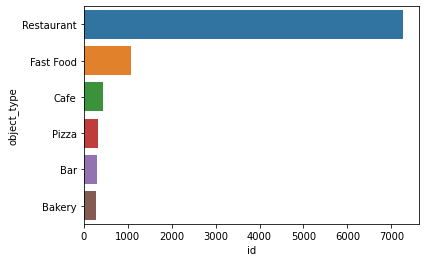

In [ ]:
sns.barplot(data = business_type,y = 'object_type', x = 'id')

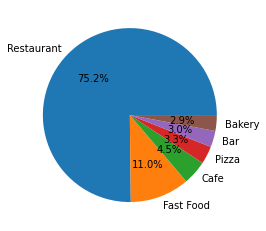

In [ ]:
plt.pie(business_type['id'], labels=business_type['object_type'], autopct='%.1f%%')
plt.show()

In [ ]:
business_type

,object_type,id
5,Restaurant,7255
3,Fast Food,1066
2,Cafe,435
4,Pizza,320
1,Bar,292
0,Bakery,283


Terdapat 6 jenis usaha kuliner dengan hasil sebagai berikut :
- `Restaurant` memegang posisi pertama dengan `75.2%` atau `7255` usaha.
- `Fast Food` memegang posisi ke dua dengan `11%` atau `1066` usaha.
- `Cafe` memegang posisi ke tiga dengan `4.5%` atau `435` usaha.
- `Pizza` memegang posisi ke dengan `3.3%` atau `320` usaha.
- `Bar` memegang posisi ke dengan `3%` atau `292` usaha.
- `Bakery` memegang posisi ke dengan `2.9%` atau `283` usaha.

#### Usaha Waralaba dan Nonwaralaba

In [ ]:
chain = data.groupby('chain')['id'].count().reset_index()
chain

,chain,id
0,False,5972
1,True,3676


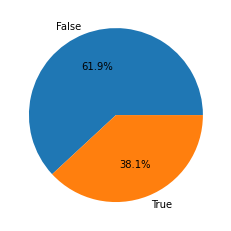

In [ ]:
plt.pie(chain['id'], labels=chain['chain'], autopct='%.1f%%')
plt.show()

`61.9%` dari usaha kuliner merupakan non waralaba dan `38.1%` merupakan usaha waralaba

#### Jenis Usaha Waralaba

In [ ]:
business_chain = pd.pivot_table(data, values = 'id', index = 'object_type',
                                columns = 'chain', aggfunc = 'count', margins=True)
business_chain = business_chain[:6].fillna(0).reset_index()
business_chain

chain,object_type,False,True,All
0,Bakery,0.0,283.0,283
1,Bar,215.0,77.0,292
2,Cafe,169.0,266.0,435
3,Fast Food,461.0,605.0,1066
4,Pizza,166.0,153.0,319
5,Restaurant,4961.0,2292.0,7253


In [ ]:
business_chain['ratio'] = round(business_chain[True] / business_chain['All'] * 100, 2)
business_chain

chain,object_type,False,True,All,ratio
0,Bakery,0.0,283.0,283,100.00
1,Bar,215.0,77.0,292,26.37
2,Cafe,169.0,266.0,435,61.15
3,Fast Food,461.0,605.0,1066,56.75
4,Pizza,166.0,153.0,319,47.96
5,Restaurant,4961.0,2292.0,7253,31.60


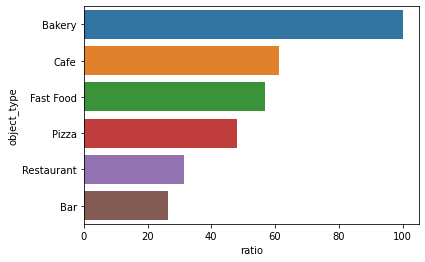

In [ ]:
bar = sns.barplot(data=business_chain.sort_values(by='ratio', ascending=False), x='ratio', y='object_type')
plt.show()

In [ ]:
business_chain

chain,object_type,False,True,All,ratio
0,Bakery,0.0,283.0,283,100.00
1,Bar,215.0,77.0,292,26.37
2,Cafe,169.0,266.0,435,61.15
3,Fast Food,461.0,605.0,1066,56.75
4,Pizza,166.0,153.0,319,47.96
5,Restaurant,4961.0,2292.0,7253,31.60


In [ ]:
chains = data[data['chain'] == True]
chains.head()

,id,object_name,chain,object_type,address,number
8,11794,ABC DONUTS,True,Fast Food,3027 N SAN FERNANDO RD UNIT 103,1
10,11796,EL POLLO LOCO,True,Restaurant,5319 W SUNSET BLVD,38
11,11797,POONG NYUN BAKERY,True,Bakery,928 S WESTERN AVE STE 109,17
12,11798,EMC RESTAURANT GROUP LLC,True,Restaurant,3500 W 6TH ST STE 101,133
14,11800,CUSCATLECA BAKERY,True,Bakery,2501 W SUNSET BLVD #A,26


In [ ]:
chain_group = chains.groupby('object_type').agg({
    'id' : 'count'
}).reset_index().sort_values(by = 'id', ascending = False)
chain_group

,object_type,id
5,Restaurant,2292
3,Fast Food,605
0,Bakery,283
2,Cafe,266
4,Pizza,153
1,Bar,77


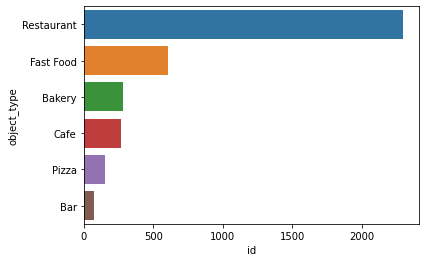

In [ ]:
bar = sns.barplot(data=chain_group.sort_values(by='id', ascending=False), x='id', y='object_type')
plt.show()

Berikut hasil dari nilai rasio waralaba dan non waralaba :
- `Restaurant` memiliki rasio sebesar `31.6%` atau `2292` merupakan waralaba.
- `Fast Food` memiliki rasio sebesar `56.75%` atau `605` merupakan waralaba.
- `Cafe` memiliki rasio sebesar `61.15%` atau `266` merupakan waralaba.
- `Pizza` memiliki rasio sebesar `47.96%` atau `153` merupakan waralaba.
- `Bar` memiliki rasio sebesar `26.37%` atau `77` merupakan waralaba.
- `Bakery` memiliki rasio sebesar `100%` atau `283` merupakan waralaba.

#### Ciri Ciri Usaha Waralaba

In [ ]:
chains.head()

,id,object_name,chain,object_type,address,number
8,11794,ABC DONUTS,True,Fast Food,3027 N SAN FERNANDO RD UNIT 103,1
10,11796,EL POLLO LOCO,True,Restaurant,5319 W SUNSET BLVD,38
11,11797,POONG NYUN BAKERY,True,Bakery,928 S WESTERN AVE STE 109,17
12,11798,EMC RESTAURANT GROUP LLC,True,Restaurant,3500 W 6TH ST STE 101,133
14,11800,CUSCATLECA BAKERY,True,Bakery,2501 W SUNSET BLVD #A,26


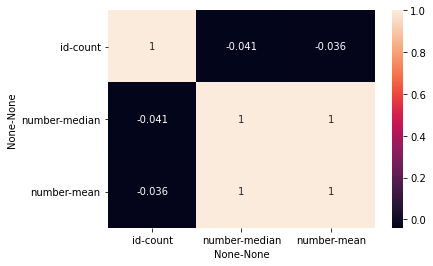

In [ ]:
corr = chains.groupby('object_name').agg({'id':'count', 'number':['median','mean']}).corr()
sns.heatmap(corr, annot=True)
plt.show()

Hasil dari analisis menunjukkan bahwa :
- Nilai rata rata memiliki tingkat korelasi sebesar `-0.036`
- Nilai median memiliki tingkat korelasi sebesar `-0.041`

#### Jumlah Kursi

In [ ]:
mean_chair = data.groupby('object_type').agg(mean=('number','mean'),median=('number','median')).sort_values(by='mean', ascending=True)
mean_chair

,mean,median
object_type,,
Bakery,21.773852,18.0
Cafe,25.000000,21.0
Pizza,28.459375,18.5
Fast Food,31.837711,21.0
Bar,44.767123,28.5
Restaurant,48.042316,29.0


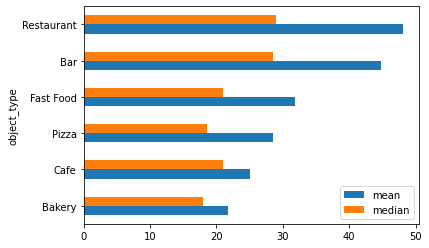

In [ ]:
mean_chair.plot(kind='barh')
plt.show()

Berikut hasil dari rata rata kursi per jenis usaha :
- Bakery memiliki nilai rata rata sebesar `21.773852`
- Cafe memiliki nilai rata rata sebesar `25`	`21`
- Pizza memiliki nilai rata rata sebesar `28.459375`	`18.5`
- Fast Food memiliki nilai rata rata sebesar `31.837711`	`21`
- Bar memiliki nilai rata rata sebesar `44.767123`	`28.5`
- Restaurant memiliki nilai rata rata sebesar `48.042316`	`29`

### Alamat

In [ ]:
address = data['address'].apply(lambda x: ' '.join(x.split(' ')[1:])).to_frame()
address = address['address'].apply(lambda x: ''.join(x.split(' # ')[0])).to_frame()
address = address['address'].apply(lambda x: ''.join(x.split('#')[0])).to_frame()
address['count'] = 1
address.head()

,address,count
0,N EAGLE ROCK BLVD,1
1,WORLD WAY,1
2,HOLLYWOOD BLVD,1
3,W SUNSET BLVD,1
4,ECHO PARK AVE,1


In [ ]:
data['address_road'] = address['address']
data.head()

,id,object_name,chain,object_type,address,number,address_road
0,11786,HABITAT COFFEE SHOP,False,Cafe,3708 N EAGLE ROCK BLVD,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,False,Restaurant,100 WORLD WAY # 120,9,WORLD WAY
2,11788,STREET CHURROS,False,Fast Food,6801 HOLLYWOOD BLVD # 253,20,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,False,Restaurant,1814 W SUNSET BLVD,22,W SUNSET BLVD
4,11790,POLLEN,False,Restaurant,2100 ECHO PARK AVE,20,ECHO PARK AVE


In [ ]:
address = address.groupby('address').count().sort_values(by='count', ascending = False).reset_index()
address

,address,count
0,W SUNSET BLVD,316
1,W PICO BLVD,308
2,WILSHIRE BLVD,226
3,SANTA MONICA BLVD,204
4,HOLLYWOOD BLVD,201
...,...,...
1963,NEBRASKA AVE,1
1964,NAUD ST,1
1965,NATIONAL BLVD,1
1966,NADEAU ST,1


Pada tahap ini dilakukan pemisahan data dan penambahan kolom dengan tujuan mempermudah proses analisis selanjutnya.

#### 10 Jalan Dengan Tempat Makan Terbanyak

In [ ]:
top_address = address.sort_values(by = 'count', ascending = False).head(10)
top_address

,address,count
0,W SUNSET BLVD,316
1,W PICO BLVD,308
2,WILSHIRE BLVD,226
3,SANTA MONICA BLVD,204
4,HOLLYWOOD BLVD,201
5,S WESTERN AVE,187
6,W 3RD ST,171
7,S VERMONT AVE,168
8,S FIGUEROA ST,160
9,W OLYMPIC BLVD,153


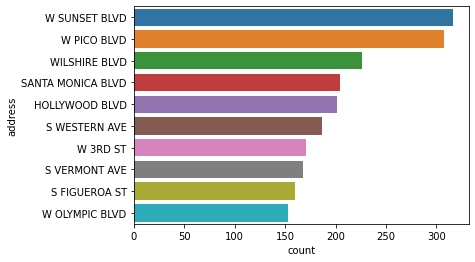

In [ ]:
sns.barplot(data = top_address, y = 'address', x = 'count')
plt.show()

Berikut hasil dari analisis 10 alamat dengan jumlah tempat makan terbanyak :
-	W SUNSET BLVD dengan `316` tempat makan yang berada di jalan tersebut
-	W PICO BLVD dengan `308` tempat makan yang berada di jalan tersebut
-	WILSHIRE BLVD dengan `226` tempat makan yang berada di jalan tersebut
-	SANTA MONICA BLVD dengan `204` tempat makan yang berada di jalan tersebut
-	HOLLYWOOD BLVD dengan `201` tempat makan yang berada di jalan tersebut
-	S WESTERN AVE dengan `187` tempat makan yang berada di jalan tersebut
-	W 3RD ST dengan `171` tempat makan yang berada di jalan tersebut
-	S VERMONT AVE dengan `168` tempat makan yang berada di jalan tersebut
-	S FIGUEROA ST dengan `160` tempat makan yang berada di jalan tersebut
-	W OLYMPIC BLVD dengan `153` tempat makan yang berada di jalan tersebut

#### Jumlah Jalan Dengan Tempat Makan Tersedikit

In [ ]:
list_data = address.groupby('count').agg({
    'address' : 'count'
})
list_data

,address
count,
1,1366
2,229
3,86
4,43
5,22
...,...
201,1
204,1
226,1


In [ ]:
address[address['count'] == 1].sample(5)

,address,count
1367,LARCHMONT AVE,1
1840,N BROADWAY STE 114,1
1757,S LA CIENGA BLVD,1
1952,OVERLAND AVE STE 150,1
1670,S COLORADO BLVD,1


Terdapat `1366` jalan dengan 1 tempat makan pada jalan tersebut.

#### Distribusi Kursi

In [ ]:
top_address.head()

,address,count
0,W SUNSET BLVD,316
1,W PICO BLVD,308
2,WILSHIRE BLVD,226
3,SANTA MONICA BLVD,204
4,HOLLYWOOD BLVD,201


In [ ]:
sunset = data[data['address_road'] == 'W SUNSET BLVD']
sunset.head()

,id,object_name,chain,object_type,address,number,address_road
3,11789,TRINITI ECHO PARK,False,Restaurant,1814 W SUNSET BLVD,22,W SUNSET BLVD
10,11796,EL POLLO LOCO,True,Restaurant,5319 W SUNSET BLVD,38,W SUNSET BLVD
31,11817,DUNES RESTAURANT,True,Restaurant,5625 W SUNSET BLVD,118,W SUNSET BLVD
33,11819,ONO HAWAIIAN BBQ,True,Restaurant,5539 W SUNSET BLVD,35,W SUNSET BLVD
34,11820,MUSH BAKERY,True,Bakery,5224 W SUNSET BLVD,15,W SUNSET BLVD


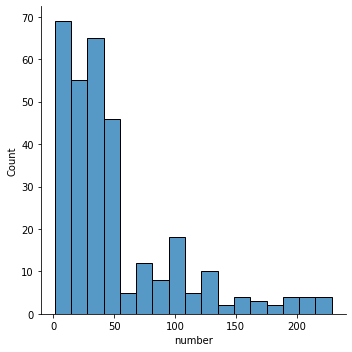

In [ ]:
sns.displot(data = sunset['number'])

In [ ]:
sunset['number'].describe()

count    316.000000
mean      50.405063
std       49.904739
min        1.000000
25%       17.000000
50%       35.000000
75%       63.750000
max      229.000000
Name: number, dtype: float64

Pada analisis `distribusi kursi` saya menggunakan data dari jalan `W SUNSET BLVD`. Berikut hasil yang didapatkan :
- Dengan rata rata tempat makan memiliki `50.4` kursi.
- Dengan jumlah terendah sebanyak `1` kursi.
- Dengan jumlah kursi terbanyak sebesar `229` kursi.

## Kesimpulan

Dataset terdiri dari:
- `id`
- `object_name` — nama usaha
- `chain` — usaha berbasis waralaba (TRUE/FALSE)
- `object_type` — jenis usaha
- `address` — alamat
- `number` — jumlah kursi

Terdapat 6 jenis usaha kuliner dengan hasil sebagai berikut :
- `Restaurant` memegang posisi pertama dengan `75.2%` atau `7255` usaha.
- `Fast Food` memegang posisi ke dua dengan `11%` atau `1066` usaha.
- `Cafe` memegang posisi ke tiga dengan `4.5%` atau `435` usaha.
- `Pizza` memegang posisi ke dengan `3.3%` atau `320` usaha.
- `Bar` memegang posisi ke dengan `3%` atau `292` usaha.
- `Bakery` memegang posisi ke dengan `2.9%` atau `283` usaha.

`61.9%` dari usaha kuliner merupakan non waralaba dan `38.1%` merupakan usaha waralaba

Berikut hasil dari nilai rasio waralaba dan non waralaba :
- `Restaurant` memiliki rasio sebesar `31.6%` merupakan waralaba.
- `Fast Food` memiliki rasio sebesar `56.75%` merupakan waralaba.
- `Cafe` memiliki rasio sebesar `61.15%` merupakan waralaba.
- `Pizza` memiliki rasio sebesar `47.96%` merupakan waralaba.
- `Bar` memiliki rasio sebesar `26.37%` merupakan waralaba.
- `Bakery` memiliki rasio sebesar `100%` merupakan waralaba.